# TENSORFLOW

Tensorflow is an open source library for numerical computations and large scale Machine Learning.

TENSOR is a vector or a matrix of n-dimension.
Flow means the flow of operations.

It is used mainly in Object Detection,Fraud Detection.

Steps in Machine learning are:
1. Training data
2. Model
3. Cost Function
4. Optimization Techniques
5. Evaluation Criteria

Estimator is a framework to build a new Machine Learning Model.

In [5]:
#importing the dependencies
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [6]:
#importing the data
data = keras.datasets.mnist

In [4]:
tf.__version__

'2.1.0'

In [8]:
#load data
(train_images, train_labels), (test_images, test_labels) = data.load_data()

In [10]:
train_images.shape

(60000, 28, 28)

 # 60000 images in form of 28 x 28 pixels

In [11]:
train_labels.shape

(60000,)

In [12]:
test_images.shape

(10000, 28, 28)

In [14]:
test_labels.shape

(10000,)

# verify data

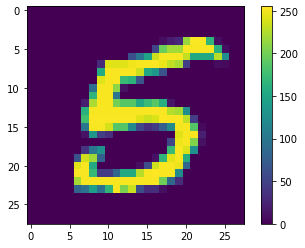

In [16]:
plt.figure()
plt.imshow(train_images[20000])
plt.colorbar()
plt.grid(False)
plt.show()

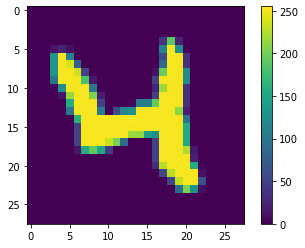

In [17]:
plt.figure()
plt.imshow(train_images[20])
plt.colorbar()
plt.grid(False)
plt.show()

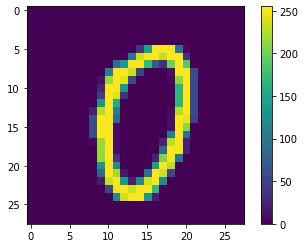

In [19]:
plt.figure()
plt.imshow(train_images[1000])
plt.colorbar()
plt.grid(False)
plt.show()

In [20]:
train_images = train_images/255.0
test_images = test_images/255.0

In [21]:
train_images

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

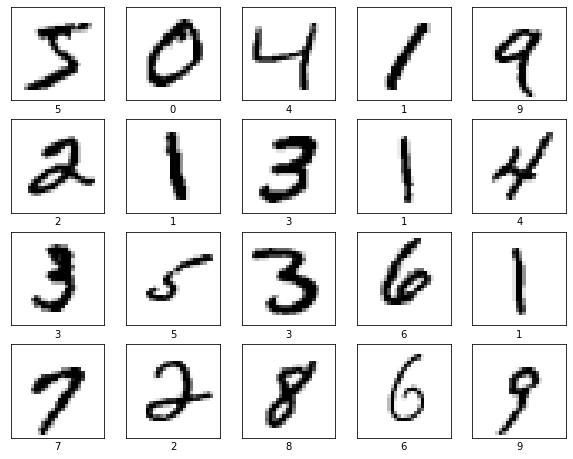

In [22]:
plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i],cmap = plt.cm.binary)
    plt.xlabel(train_labels[i])
plt.show()

# Building the Model

In [23]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

In [25]:
model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
             metrics=['accuracy'])

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 8s 127us/sample - loss: 0.2541 - accuracy: 0.9273
Epoch 2/10
60000/60000 [==============================] - 6s 96us/sample - loss: 0.1144 - accuracy: 0.9662
Epoch 3/10
60000/60000 [==============================] - 6s 98us/sample - loss: 0.0797 - accuracy: 0.9754
Epoch 4/10
60000/60000 [==============================] - 6s 98us/sample - loss: 0.0594 - accuracy: 0.9818
Epoch 5/10
60000/60000 [==============================] - 6s 94us/sample - loss: 0.0448 - accuracy: 0.9862
Epoch 6/10
60000/60000 [==============================] - 6s 100us/sample - loss: 0.0372 - accuracy: 0.9885
Epoch 7/10
60000/60000 [==============================] - 6s 104us/sample - loss: 0.0290 - accuracy: 0.9908
Epoch 8/10
60000/60000 [==============================] - 6s 101us/sample - loss: 0.0235 - accuracy: 0.9929
Epoch 9/10
60000/60000 [==============================] - 6s 99us/sample - loss: 0.0200 - accuracy: 0.9938
Epoch 10/1

# epochs is a iteration on a dataset. It is an integer.

In [30]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

10000/10000 - 1s - loss: 0.0784 - accuracy: 0.9795


# Make Predictions

In [32]:
proba_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [34]:
pred = proba_model.predict(test_images)

In [35]:
pred[1]

array([5.62983582e-15, 1.57179747e-05, 9.99984264e-01, 2.26393730e-08,
       1.85520116e-20, 2.79654810e-09, 4.35768588e-10, 7.02602497e-18,
       4.65363170e-09, 1.08176834e-16], dtype=float32)

In [37]:
np.argmax(pred[1])

2

In [38]:
test_labels[1]

2

In [39]:
np.argmax(pred[500])

3

In [40]:
test_labels[500]

3

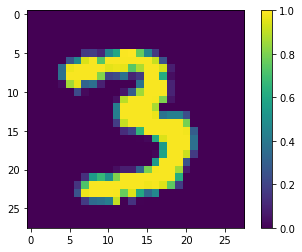

In [42]:
plt.figure()
plt.imshow(test_images[500])
plt.colorbar()
plt.grid(False)
plt.show()